In [1]:
pip install split-folders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2,os
import random
from tensorflow.keras.optimizers import Adam 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
import plotly.graph_objects as go
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19  
from tensorflow.keras.applications import mobilenet_v2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from tensorflow .keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
from PIL import Image
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

import shutil
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [5]:
data_path=r'/content/drive/MyDrive/Neqab_data'

In [6]:
import os 
CATEGORIES = os.listdir(data_path)
print(CATEGORIES)
print(len(CATEGORIES))

['Arwa', 'Asma', 'Monera', 'Hanan', 'Rouza', 'Bushra alzharani', 'meme', 'Arwa alzharani', 'Asma alzharani']
9


In [7]:
training_data = []
IMG_SIZE=128
def making_trian_dataset():
    for category in CATEGORIES:
        path = os.path.join(data_path, category) # path to our data
        class_num = CATEGORIES.index(category)# classifcation index
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resizing our imgz
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
making_trian_dataset()

In [ ]:
# training_data

In [8]:
print(len(training_data))

78


**shuffle data**

In [9]:
 random.shuffle(training_data)
# train_data, labels_data = zip(*training_data)

In [ ]:
# for Sample in training_data[:10]:
#     print(Sample[1])

**Data Labeled**

In [10]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)#.reshape(-1, IMG_SIZE,IMG_SIZE,3)
y = to_categorical(y, num_classes = len(CATEGORIES))

In [ ]:
X.shape,y.shape

((78, 128, 128, 3), (78, 9))

**Data Splitting**

In [11]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=.2, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=77)
print(f"\nTraining data: {X_train.shape},  labels: {y_train.shape}")
print(f"Validation data: {X_val.shape},  labels: {y_val.shape}")
print(f"Testing data: {X_test.shape},  labels: {y_test.shape}")


Training data: (62, 128, 128, 3),  labels: (62, 9)
Validation data: (8, 128, 128, 3),  labels: (8, 9)
Testing data: (8, 128, 128, 3),  labels: (8, 9)


**VGG19**

In [13]:
IMAGE_SIZE = [128, 128]

In [14]:
model_vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)  

58900480/58889256 [==============================] - 0s 0us/step


In [15]:
# don't train existing weights
for layer in model_vgg16.layers:
  layer.trainable = False

In [16]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/Neqab_data/*')

In [17]:
# our layers - you can add more if you want
x = Flatten()(model_vgg16.output)
# x = Dense(1000, activation='relu')(x)

prediction = Dense(len(folders), activation='softmax')(x)

In [18]:
# create a model object
model_20_vgg16 = Model(inputs=model_vgg16.input, outputs=prediction)

In [19]:
# view the structure of the model
model_20_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [20]:
# tell the model what cost and optimization method to use
model_20_vgg16.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
model_20_vgg16.save_weights('weights_neqab11_vgg16__11:30am.h5', save_format='h5')

In [23]:
import tensorflow as tf
from tensorflow import keras

chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [24]:
result_V16 = model_20_vgg16.fit(X_train,y_train, 
                                validation_data=(X_val,y_val), 
                                batch_size=64,
                                epochs=20,
                                callbacks=[chechpoint]
                                )

Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 22.5567 - accuracy: 0.0484 - val_loss: 12.3753 - val_accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 0s 64ms/step - loss: 7.8784 - accuracy: 0.4032 - val_loss: 12.5898 - val_accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 163ms/step - loss: 4.3683 - accuracy: 0.6290 - val_loss: 9.6788 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 172ms/step - loss: 1.2011 - accuracy: 0.8065 - val_loss: 8.2819 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 66ms/step - loss: 0.4560 - accuracy: 0.9355 - val_loss: 7.6962 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 63ms/step - loss: 0.1442 - accuracy: 0.9677 - val_loss: 7.3287 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 63ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 7.0449 - val_accuracy: 0.7500
Epoch 8/20
1/1 [======

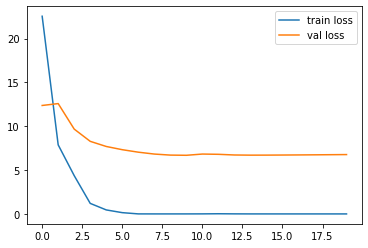

<Figure size 432x288 with 0 Axes>

In [26]:
# loss
plt.plot(result_V16.history['loss'], label='train loss')
plt.plot(result_V16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

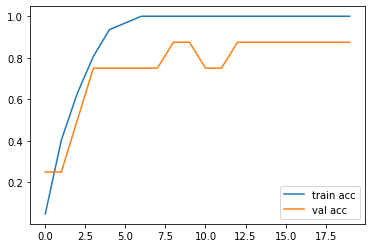

<Figure size 432x288 with 0 Axes>

In [27]:
# accuracies
plt.plot(result_V16.history['accuracy'], label='train acc')
plt.plot(result_V16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [28]:
import tensorflow as tf

from keras.models import load_model

model_20_vgg16.save('save_model_20_vgg16.h5')

**save model to drive**

In [29]:
# mount it
from google.colab import drive
drive.mount('/content/drive')
# copy it there
!cp /content/save_model_20_vgg16.h5 /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**load model**

In [ ]:
# from keras import models
# #Load the saved model
# model = models.load_model("/model_model_20_vgg19_1_30am.h5")

In [ ]:
# model

In [ ]:
# model_uplod = model.fit(X_train,y_train, 
#                                 validation_data=(X_val,y_val), 
#                                 batch_size=64,
#                                 epochs=2,
#                                 callbacks=[chechpoint]
#                                 )

**Test**

In [ ]:
#print("Accuracy of our model on test data : " , model_20_vgg19.evaluate(X_test,y_test)[1]*100 , "%")

**####################**

In [ ]:
# import cv2
# import numpy as np
# from PIL import Image
# from keras import models

# #Load the saved model
# model = model_20_vgg19
# #models.load_model("model_model_20_vgg19_1_30am.h5")
# video = cv2.VideoCapture(0)

# while True:
#         _, frame = video.read()

#         #Convert the captured frame into RGB
#         im = Image.fromarray(frame, 'RGB')

#         #Resizing into 128x128 because we trained the model with this image size.
#         im = im.resize((128,128))
#         img_array = np.array(im)

#         #Our keras model used a 4D tensor, (images x height x width x channel)
#         #So changing dimension 128x128x3 into 1x128x128x3 
#         img_array = np.expand_dims(img_array, axis=0)

#         #Calling the predict method on model to predict 'me' on the image
#         prediction = int(model.predict(img_array)[0][0])

#         #if prediction is 0, which means I am missing on the image, then show the frame in gray color.
#         if prediction == 0:
#                 frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#         cv2.imshow("Capturing", frame)
#         key=cv2.waitKey(1)
#         if key == ord('q'):
#                 break
# video.release()
# cv2.destroyAllWindows()